In [1]:
import numpy as np

In [2]:
def selection_sort(x):
    for i in range(len(x)): 
        swap = i + np.argmin(x[i:]) 
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [3]:
x = np.array([2, 1, 3, 5, 4])
# selection_sort(x)

In [4]:
np.sort(x) 


array([1, 2, 3, 4, 5])

In [5]:
i = np.argsort(x) # Shows the indices of the sorted elements
x[i]

array([1, 2, 3, 4, 5])

In [6]:
rand =  np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [7]:
 #Using np.sort() axis parameter

print(np.sort(x, axis=0)) # Sorting the columns. 
print(np.sort(x, axis=1)) # Sorting the rows. 

[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]
[[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [1 2 4 5 7 7]
 [0 1 4 5 5 9]]


In [8]:
# Partioning
X = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(X, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [9]:
np.partition(x, 3, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [2, 1, 4, 5, 7, 7],
       [0, 4, 1, 5, 9, 5]])

In [10]:
np.partition??

Signature:       np.partition(a, kth, axis=-1, kind='introselect', order=None)
Call signature:  np.partition(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function partition at 0x0000024E5070FEC0>
File:            c:\users\astrojoe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py
Source:         
@array_function_dispatch(_partition_dispatcher)
def partition(a, kth, axis=-1, kind='introselect', order=None):
    """
    Return a partitioned copy of an array.

    Creates a copy of the array with its elements rearranged in such a
    way that the value of the element in k-th position is in the position
    the value would be in a sorted array.  In the partitioned array, all
    elements before the k-th element are less than or equal to that
    element, and all the elements after the k-th element are greater than
    or equal to that element.  The ordering of the elements in the two
    partitions is undefined.

    .. versionadded:: 1.8.0

    Paramete

In [11]:
# k-Nearest Neighbours

X = rand.rand(10, 2)

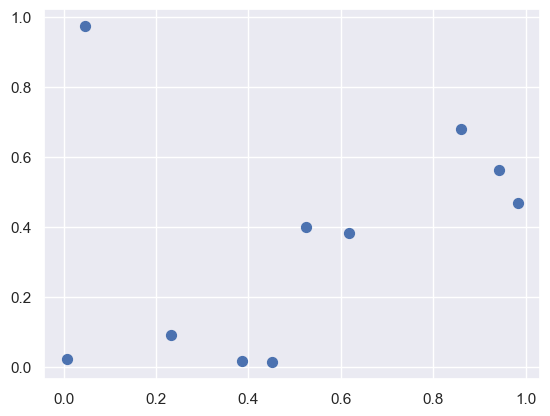

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn; seaborn.set() # Plot styling 
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

In [13]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq 


array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

In [14]:
# dist_sq.shape
# dis_sq.diagonal()

nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [15]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

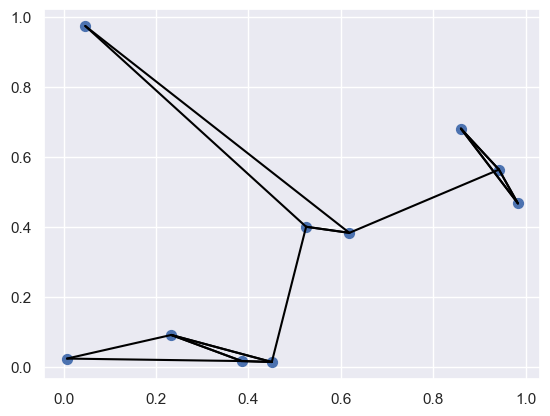

In [16]:
plt.scatter(X[:, 0], X[:, 1], s=50)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
# plot a line from X[i] to X[j]
# use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')
plt.show()

In [25]:
# Structured Numpy Arrays
# Normal NUmpy arrays do not allow for heterogeneous datd, but these numpy 
# structured arrays can contain heterogeneous data types. 

# If you want to store certain info about a group of ppl 
name = ['Alice', 'Bob', 'Cathy', 'Dough']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

# These info can be contained in one array using;
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)
print('\n')
print(data)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


[('', 0, 0.) ('', 0, 0.) ('', 0, 0.) ('', 0, 0.)]


In [26]:
data['name'] = name
data['age'] = age 
data['weight'] = weight 
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Dough', 19, 61.5)]


In [30]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Dough'], dtype='<U10')

In [33]:
data[0]

('Alice', 25, 55.)

In [35]:
data[-1]['name']

'Dough'

In [36]:
# Get names where age is under 30

data[data['age'] < 30]['name']

array(['Alice', 'Dough'], dtype='<U10')